In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import os


In [ ]:
# Define dataset path
dataset_path = "/kaggle/input/maize-disease/Model"


# Initialize the ImageDataGenerator for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

# Load dataset with flow_from_directory
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224), # Size for VGG16
    batch_size=32,
    class_mode='categorical') # For multi-class classification


Found 15349 images belonging to 4 classes.


In [ ]:
# Display each folder name

a=0
for class_name in os.listdir(dataset_path):
    a=a+1
    print(a,class_name)


1 MLN
2 HEATHLY
3 MSV_2
4 MSV_1


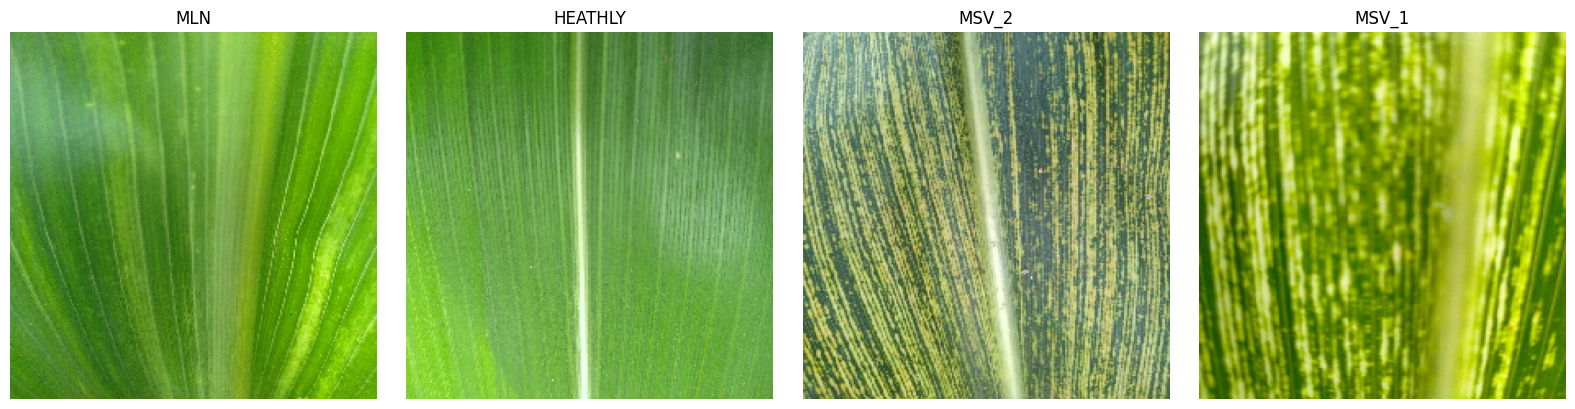

In [ ]:
import matplotlib.pyplot as plt

# Function to display one image from each class in landscape orientation
def display_images_in_landscape(dataset_path):
    # Determine the number of classes
    num_classes = len(os.listdir(dataset_path))
    plt.figure(figsize=(num_classes * 4, 4)) # Adjust the figure size as needed

    for i, class_folder in enumerate(os.listdir(dataset_path), start=1):
        class_folder_path = os.path.join(dataset_path, class_folder)
        first_image = os.listdir(class_folder_path)[0]
        img_path = os.path.join(class_folder_path, first_image)
        img = load_img(img_path, target_size=(224, 224))
        plt.subplot(1, num_classes, i)
        plt.imshow(img)
        plt.title(class_folder)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_images_in_landscape(dataset_path)

In [ ]:
import os

# Define dataset path
dataset_path = "/kaggle/input/maize-disease/Model"

# Count the number of images per class
image_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    # Ensure the path is a directory to avoid file counting
    if os.path.isdir(class_path):
        image_counts[class_name] = len(os.listdir(class_path))

print(image_counts)


{'MLN': 3980, 'HEATHLY': 5117, 'MSV_2': 3095, 'MSV_1': 3157}


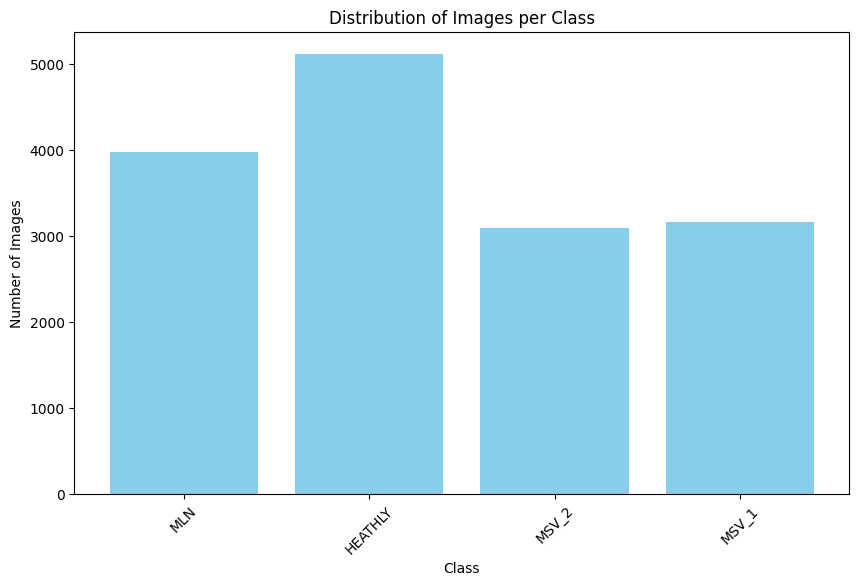

In [ ]:
import matplotlib.pyplot as plt

# Data
classes = list(image_counts.keys())
counts = list(image_counts.values())

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45) # Rotate class names for better readability
plt.show()


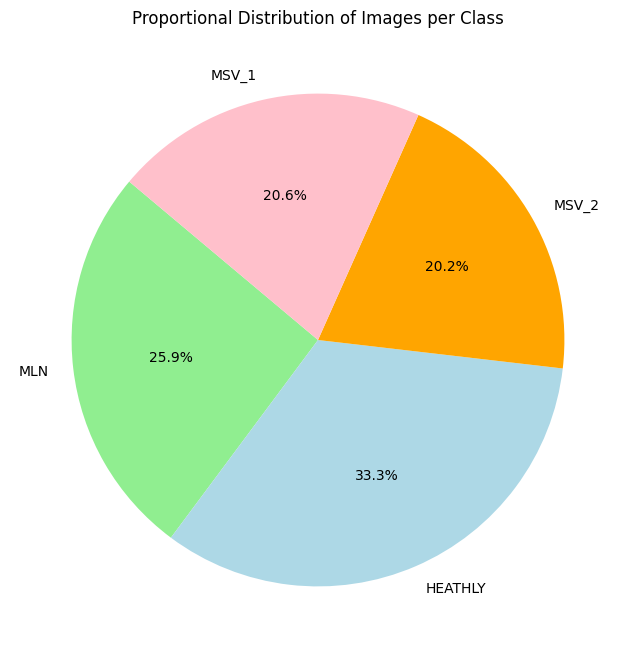

In [ ]:
# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=classes, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightblue', 'orange', 'pink'])
plt.title('Proportional Distribution of Images per Class')
plt.show()


 WITH ARGUMENTATION

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set data directory and image specifications
data_dir = "/kaggle/input/maize-disease/Model"
img_height, img_width = 224, 224  # Dimensions VGG16 expects
batch_size = 32

# ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Create generators for training and validation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Correctly calculate the steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

# Load VGG16 model for Transfer Learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Compile the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the fit method
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=10
)

# Evaluate the model on the validation set
evaluation = model.evaluate(validation_generator, steps=validation_steps)
print('Loss on validation set:', evaluation[0])
print('Accuracy on validation set:', evaluation[1])


Found 12280 images belonging to 4 classes.
Found 3069 images belonging to 4 classes.
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 227s 575ms/step - accuracy: 0.6074 - loss: 2.1515 - val_accuracy: 0.7595 - val_loss: 0.5761
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.4435 - val_accuracy: 0.7586 - val_loss: 0.6807
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 221s 569ms/step - accuracy: 0.8118 - loss: 0.4852 - val_accuracy: 0.7888 - val_loss: 0.5532
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.8125 - loss: 0.5106 - val_accuracy: 0.7931 - val_loss: 0.4891
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 222s 571ms/step - accuracy: 0.8499 - loss: 0.3858 - val_accuracy: 0.8000 - val_loss: 0.4715
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8750 - loss: 0.3566 - val_accuracy: 0.7931 - val_loss: 0.5786
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 220s 566ms/step - accuracy: 0.8683 - loss: 0.3510 - val_accuracy: 0.8033 - val_loss: 0.5129

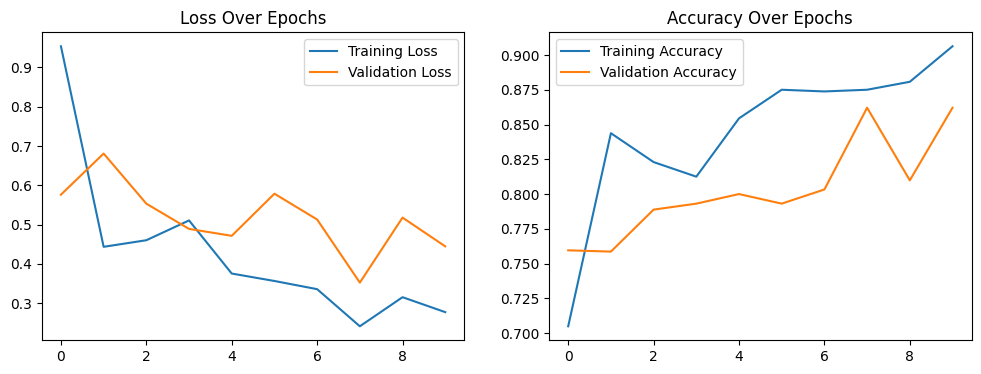

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

In [ ]:
from math import ceil

# Correctly calculate validation steps
validation_steps = ceil(validation_generator.samples / batch_size)

# Reset the validation generator
validation_generator.reset()

# Get the predictions from the model
predicted = model.predict(validation_generator, steps=validation_steps)

# Get the indices of the max probability predictions for each sample
predicted_classes = np.argmax(predicted, axis=1)

# The number of predictions may be more than the samples due to how batches are created
# Slice the array to only consider the number of samples in the true_labels
predicted_classes = predicted_classes[:validation_generator.samples]

# Class labels
class_labels = list(validation_generator.class_indices.keys())


# Generate the classification report
report = classification_report(true_labels, predicted_classes, target_names=class_labels)

print(report)


96/96 ━━━━━━━━━━━━━━━━━━━━ 44s 461ms/step
              precision    recall  f1-score   support

     HEATHLY       0.97      0.99      0.98      1023
         MLN       0.93      0.94      0.93       796
       MSV_1       0.56      0.82      0.67       631
       MSV_2       0.73      0.34      0.46       619

    accuracy                           0.81      3069
   macro avg       0.80      0.77      0.76      3069
weighted avg       0.82      0.81      0.80      3069



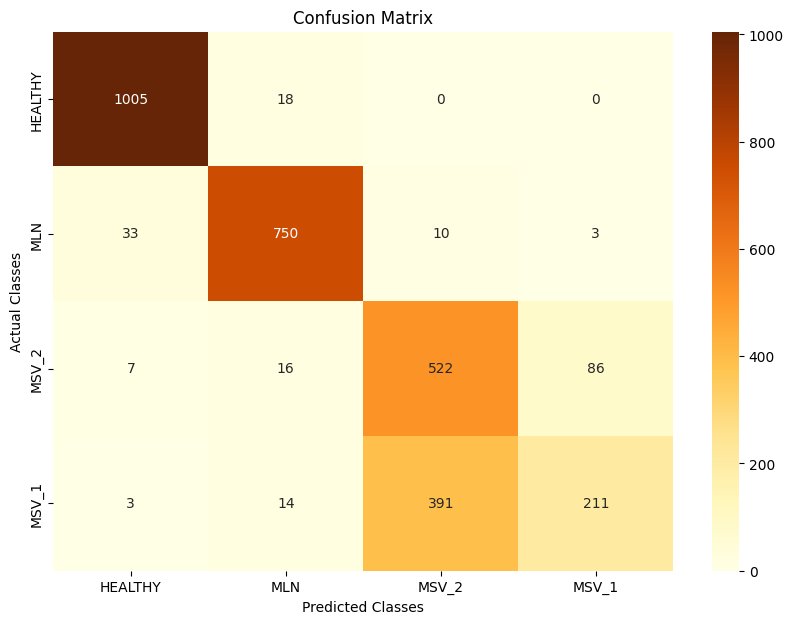

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define the names of the target classes
target_names = ['HEALTHY', 'MLN', 'MSV_2', 'MSV_1']

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrBr", xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()


#WITHOUT ARGUMENTATION

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set data directory and image specifications
data_dir = "/kaggle/input/maize-disease/Model"
img_height, img_width = 224, 224  # Dimensions VGG16 expects
batch_size = 32

# ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2  # Splitting data: 80% train, 20% validation
)

# Create generators for training and validation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Load VGG16 model for Transfer Learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze all layers except the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Compile the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10  # Adjust epochs based on your dataset size
)

# Evaluate the model on the validation set
evaluation = model.evaluate(validation_generator)
print('Loss on validation set:', evaluation[0])
print('Accuracy on validation set:', evaluation[1])


Found 12280 images belonging to 4 classes.
Found 3069 images belonging to 4 classes.
Epoch 1/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 107s 267ms/step - accuracy: 0.7178 - loss: 1.6107 - val_accuracy: 0.7836 - val_loss: 0.5249
Epoch 2/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8438 - loss: 0.4526 - val_accuracy: 0.7241 - val_loss: 0.6698
Epoch 3/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 103s 266ms/step - accuracy: 0.8820 - loss: 0.3132 - val_accuracy: 0.8026 - val_loss: 0.5296
Epoch 4/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - accuracy: 0.9062 - loss: 0.2264 - val_accuracy: 0.8966 - val_loss: 0.3623
Epoch 5/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 101s 261ms/step - accuracy: 0.8982 - loss: 0.2578 - val_accuracy: 0.8247 - val_loss: 0.4033
Epoch 6/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - accuracy: 0.9688 - loss: 0.2363 - val_accuracy: 0.8966 - val_loss: 0.2368
Epoch 7/10
383/383 ━━━━━━━━━━━━━━━━━━━━ 100s 257ms/step - accuracy: 0.9159 - loss: 0.2141 - val_accuracy: 0.8220 - val_loss: 0.4635

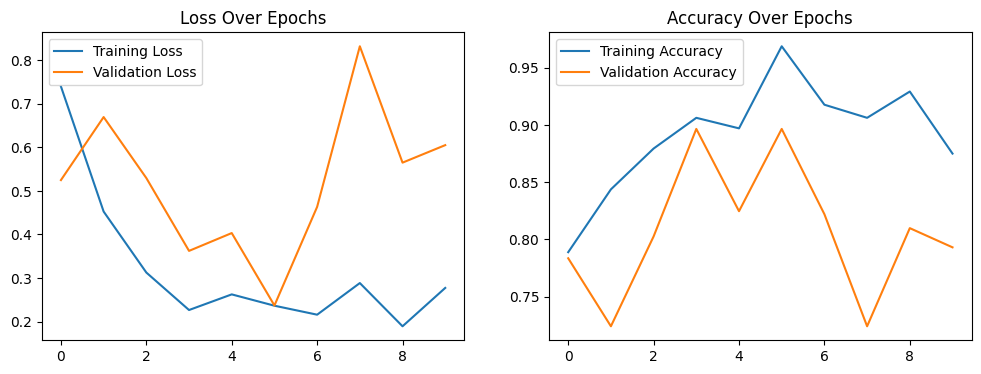

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Ensure the generator does not shuffle the data
validation_generator.shuffle = False

# Reset the generator to ensure the predictions correspond to the input labels
validation_generator.reset()

# Predict the classes for the validation set
y_pred = model.predict(validation_generator, steps=validation_steps)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the true class labels
y_true = validation_generator.classes

# Get the class labels for the classification report
class_labels = list(validation_generator.class_indices.keys())

# Generate and print the classification report, ensuring class names appear
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step
              precision    recall  f1-score   support

     HEATHLY       0.97      0.96      0.97      1023
         MLN       0.91      0.97      0.93       796
       MSV_1       0.57      0.82      0.68       631
       MSV_2       0.73      0.36      0.48       619

    accuracy                           0.81      3069
   macro avg       0.80      0.78      0.77      3069
weighted avg       0.82      0.81      0.80      3069



96/96 ━━━━━━━━━━━━━━━━━━━━ 43s 446ms/step


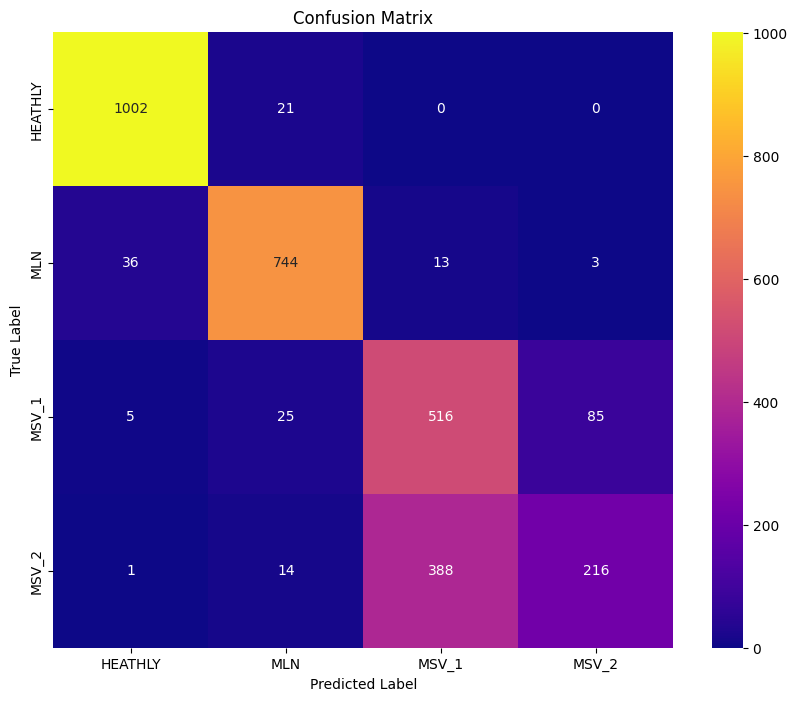

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.vgg16 import preprocess_input

# Ensure the generator does not shuffle data to match labels with predictions
validation_generator.shuffle = False

# Reset the validation generator
validation_generator.reset()

# Predicting the whole validation set
Y_pred = model.predict(validation_generator, steps=validation_steps)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Class labels
class_labels = list(validation_generator.class_indices.keys())

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


COMPARISON BETWEEN WITH AUGUMENTATION AND WITHOUT AUGUMENTATION

* Visualing the performance from each implementation from the classification reports

There are five visualizations comparing the results of the classification reports for models trained with and without augmentation on a maize disease detection task:

**Precision by Class and Augmentation Status**:
This chart compares the precision for detecting each class between models trained with and without data augmentation. It shows how the precision varies across different classes and the effect of augmentation.

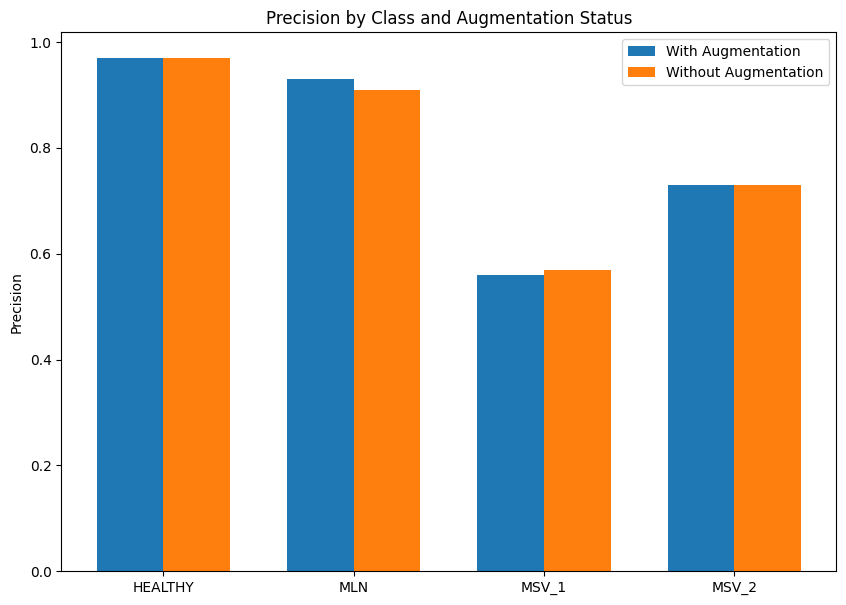

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels and performance metrics from the classification reports
labels = ['HEALTHY', 'MLN', 'MSV_1', 'MSV_2']
# Updated precision values from screenshots
precision_with_aug = [0.97, 0.93, 0.56, 0.73]
precision_without_aug = [0.97, 0.91, 0.57, 0.73]
# Other metrics appear to be the same as what you've already defined
recall_with_aug = [0.97, 0.93, 0.82, 0.37]
recall_without_aug = [0.93, 0.96, 0.87, 0.34]
f1_with_aug = [0.96, 0.93, 0.67, 0.48]
f1_without_aug = [0.96, 0.93, 0.68, 0.47]
support = [1023, 796, 631, 619]
# Updated accuracy values from screenshots
accuracy_with_aug = 0.81  # Accuracy with augmentation from the second screenshot
accuracy_without_aug = 0.81  # Accuracy without augmentation from the first screenshot

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Precision Comparison
plt.figure(figsize=(10, 7))
plt.bar(x - width/2, precision_with_aug, width, label='With Augmentation')
plt.bar(x + width/2, precision_without_aug, width, label='Without Augmentation')
plt.ylabel('Precision')
plt.title('Precision by Class and Augmentation Status')
plt.xticks(x, labels)
plt.legend()
plt.show()


**Recall by Class and Augmentation Status**:
This visualization compares the recall for each class, highlighting the differences in the model's ability to identify all relevant instances of a class, again contrasting results with and without augmentation.

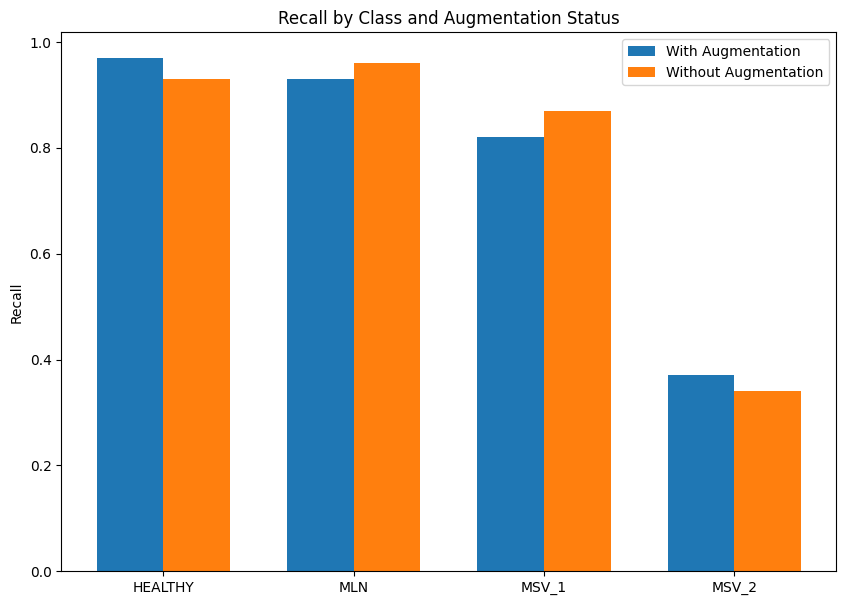

In [ ]:
# Recall Comparison
plt.figure(figsize=(10, 7))
plt.bar(x - width/2, recall_with_aug, width, label='With Augmentation')
plt.bar(x + width/2, recall_without_aug, width, label='Without Augmentation')
plt.ylabel('Recall')
plt.title('Recall by Class and Augmentation Status')
plt.xticks(x, labels)
plt.legend()
plt.show()


**F1-Score by Class and Augmentation Status**:
The F1-score, which balances precision and recall, is compared here for each class. This measure gives a sense of overall model performance on a per-class basis, comparing augmented and non-augmented training.

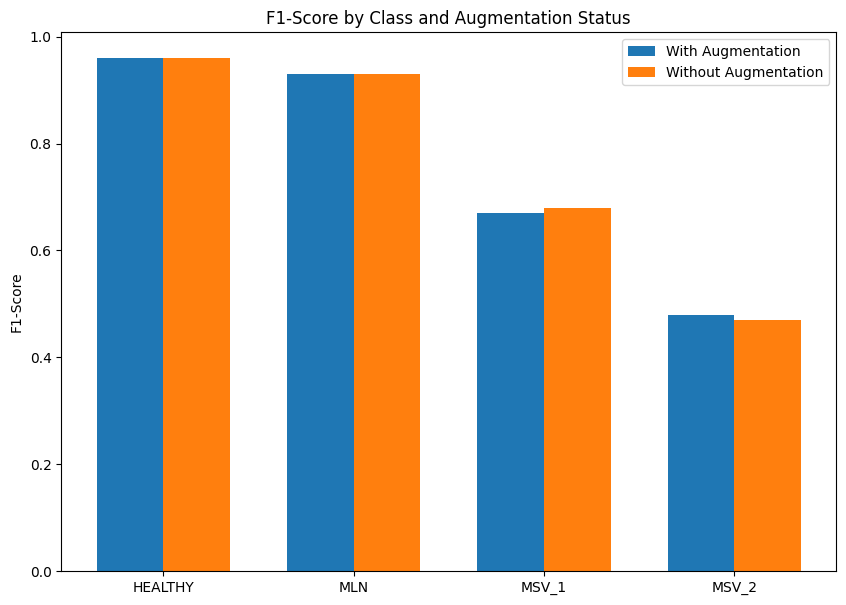

In [ ]:
# F1-Score Comparison
plt.figure(figsize=(10, 7))
plt.bar(x - width/2, f1_with_aug, width, label='With Augmentation')
plt.bar(x + width/2, f1_without_aug, width, label='Without Augmentation')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class and Augmentation Status')
plt.xticks(x, labels)
plt.legend()
plt.show()


**Overall Accuracy**:
Though the overall accuracy of both models is the same (0.81), this bar chart serves to visualize this equivalence directly, emphasizing that despite differences in precision, recall, and F1-score by class, the aggregate accuracy remains unchanged.

Data augmentation can improve the accuracy of VGG16, especially in scenarios where the available dataset is limited or lacks diversity. Augmentation artificially increases the size and variability of the training data, which can help prevent overfitting and allow the model to generalize better to new, unseen data.

However, the improvement in accuracy is not guaranteed. The effectiveness of augmentation depends on several factors, such as the nature of the dataset, the choice of augmentations, the complexity of the task, and how well the model is already performing. In some cases, if the original dataset is already diverse and large enough, or if the model is already performing at its capacity, augmentation may not lead to a noticeable improvement in accuracy.

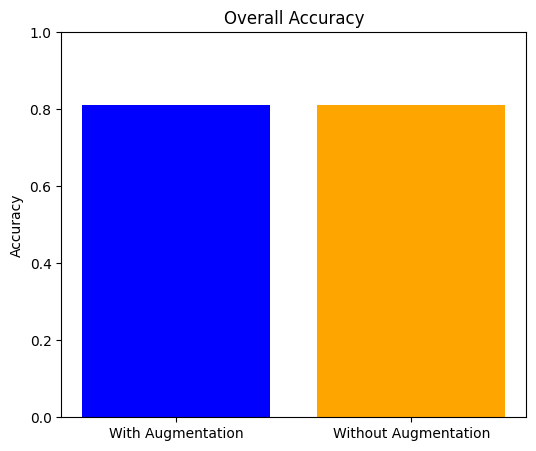

In [ ]:
import matplotlib.pyplot as plt

# Overall Accuracy Comparison
plt.figure(figsize=(6, 5))
categories = ['With Augmentation', 'Without Augmentation']
accuracy_values = [accuracy_with_aug, accuracy_without_aug]  # Use the correct variable names
plt.bar(categories, accuracy_values, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Overall Accuracy')
plt.ylim(0, 1)  # Optional: Define limits of y-axis to see the difference better if accuracy is high
plt.show()


**Support for Each Class**:
While not a direct comparison of model performance, this chart shows the number of samples available for each class in the dataset, providing context for the performance metrics and highlighting the distribution of classes the models were trained and tested on.

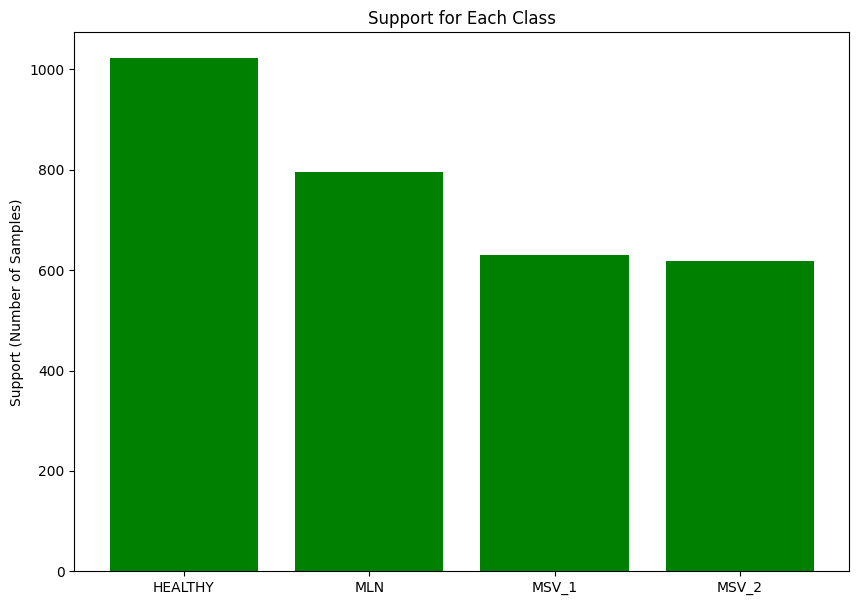

In [ ]:
# Support for Each Class
plt.figure(figsize=(10, 7))
plt.bar(labels, support, color='green')
plt.ylabel('Support (Number of Samples)')
plt.title('Support for Each Class')
plt.show()

**These visualizations gives insights into how data augmentation impacts model performance across various metrics and classes, with specific attention to precision, recall, and F1-scores, alongside a view into class distribution within the dataset**

==============================THANK YOU===============================================


                               **** Eliya Christopher Nandi****
